# EK121 Final Project, Fall 2023

*Title:*

Social Security Disability Requests Vary by Northern vs. Southern States in the USA

*Submitted Date:*

Oct. 16, 2023

-------------


*My name and Boston University email address*, as a tuple:

In [35]:
myname = ("Andrew Sabelhaus", "asabelha@bu.edu")

*My teammates' names and Boston University email addresses, as tuples:*

In [36]:
teammate1 = ("Jeffrey Carruthers", "jbc@bu.edu")

In [37]:
teammate2 = ("Jacob Norman", "jfnorman@bu.edu")

In [38]:
teammate3 = ()

-------------

*Summary:*

Something about Social Security Disability and why it's important. Some dataset could answer an important question for us. We used data this-or-that. Our analysis...

--insert-your-project-here--

Setup:

In [1]:
import numpy as np #numpy maybe not needed
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
# rcParams from https://matplotlib.org/stable/users/explain/customizing.html

In [2]:
data_url = "https://www.dropbox.com/s/ie1zvkr7iht2i1j/public_workingtimedata.dta?dl=1" # store data url here

df = pd.read_stata(data_url) # data is a stata file, so use read_stata to get dataframe set up
#df.to_csv('./csv.csv') # test used so we can look at raw data and as CSV instead of .dta/stata
#no real cleaning required, very nice data set. Some NaN values that will be discussed later, but largely not impactful.

### Part 1: Global Labor Trends

Our initial thought when looking at this dataset is that there must be a shift in the normal working hours based on the year. In other words, it seemed reasonable that as technology and living standards improved with time, there would be a decrease in working hours. Thus, we hypothesize that, globally, there has been a trend towards lower labor hours.

This dataset included a "normalhours" column, which is the "Normal Working Hours" we reference throughout these next few plots. These hours are based on the regulations set by each country. 

To illustrate our hypothesis, let us first examine the United States.

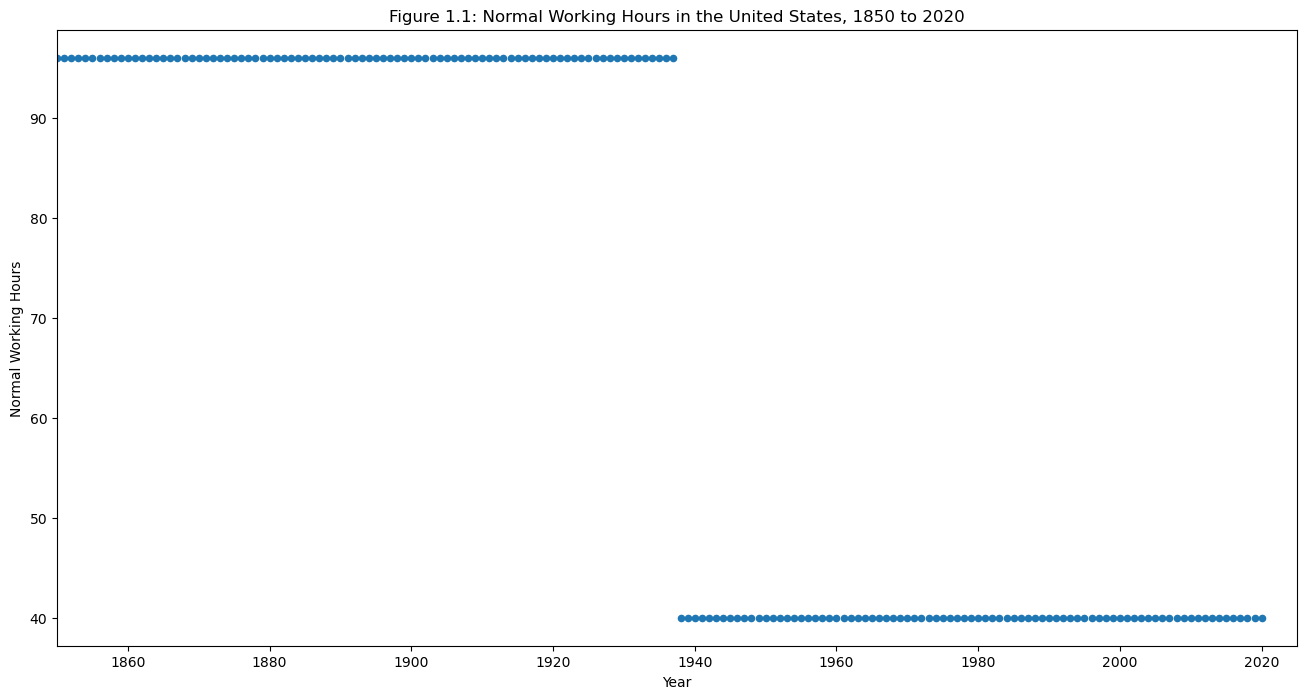

In [60]:
# Plot 1.1

df_by_year = df.sort_values(["year"]) # sort everything by year
df_US = df.loc[df['country_name'] == "United States of America"] # get only the USA labor hours data

df_US_hours = df_US[["country_name", "year", "normalhours"]] # only get these columns 
df_US_hours.plot.scatter(x="year", y="normalhours") # plot the year vs. normal working hours

plt.xlabel('Year')
plt.ylabel('Normal Working Hours')
plt.title('Figure 1.1: Normal Working Hours in the United States, 1850 to 2020')
plt.xlim(1850, 2025)

plt.show()

As reflected in the plot, we can see that normal working hours in the United States changed drastically around the late 30s and early to mid 40s. There is only one major shift here, rather than a gradual trend downwards. There might be some big factor driving this change, and given that this is the 40s, perhaps it has to do with labor during wartime, given that World War II started in 1939 and ended in 1945. 

This trend matches our hypothesis, but given that this might be linked to a major war and that we only looked at one country, we couldn't be sure if our hypothesis was correct. So, we should examine all the countries in this dataset together.

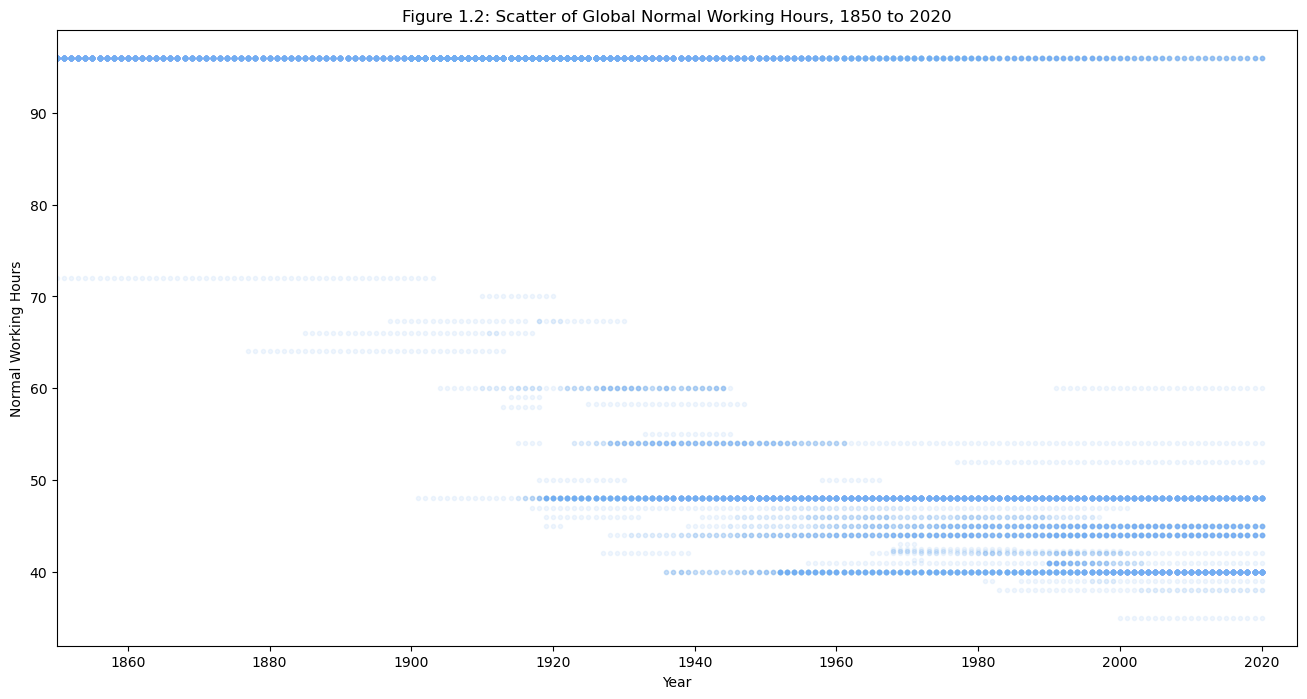

In [61]:
# Plot 1.2
pd.pivot_table(df.reset_index(), index='year', columns='country_name', values='normalhours').plot(legend=None, alpha=0.1, linestyle='None', marker='.', color="#72aef2") # https://www.statology.org/pandas-groupby-plot/

plt.xlabel('Year')
plt.ylabel('Normal Working Hours')
plt.title('Figure 1.2: Scatter of Global Normal Working Hours, 1850 to 2020')
plt.xlim(1850, 2025)

plt.show()

It is evident that there is cluster of suddenly lower datapoints beginning between 1920 and 1940. This is a smiliar trend worldwide as to plot 1.1, where normal working hours suddenly dropped around 1940. With some countries dropping pre-1940, we can see that an event such as WWII is not the only reason for this global shift in labor. Although a trend is visible, there are simply too many data points, it's hard to read! Looking at mean working hours can help clarify this.

In [20]:
#mean normal working hours in 2020 vs 1930

df_2020 = df.loc[df['year'] == 2020]
df_1930 = df.loc[df['year'] == 1930]

#print(len(df_2020), len(df_1930)) #checking that not too many data points are lost here!

mean_hours_2020 = df_2020.loc[:, 'normalhours'].mean()
mean_hours_1930 = df_1930.loc[:, 'normalhours'].mean()

print(f"The mean working normal working hours (to the nearest hour) in 2020 was {mean_hours_2020:.0f}, while the mean in 1930 was {mean_hours_1930:.0f}.")

The mean working normal working hours (to the nearest hour) in 2020 was 46, while the mean in 1930 was 80


So, the mean normal working hours decreased by 34 hours between 1930 and 2020. This matches what we see in Figure 1.2, a global trend of decreasing work hours over the past 90ish years. Neat! Work hours have clearly decreased across the board, which lines up with our hypthesis nicely.

Let's take a look at a few individual countries, just for clarity, as Figure 1.2 is a bit hard to read.

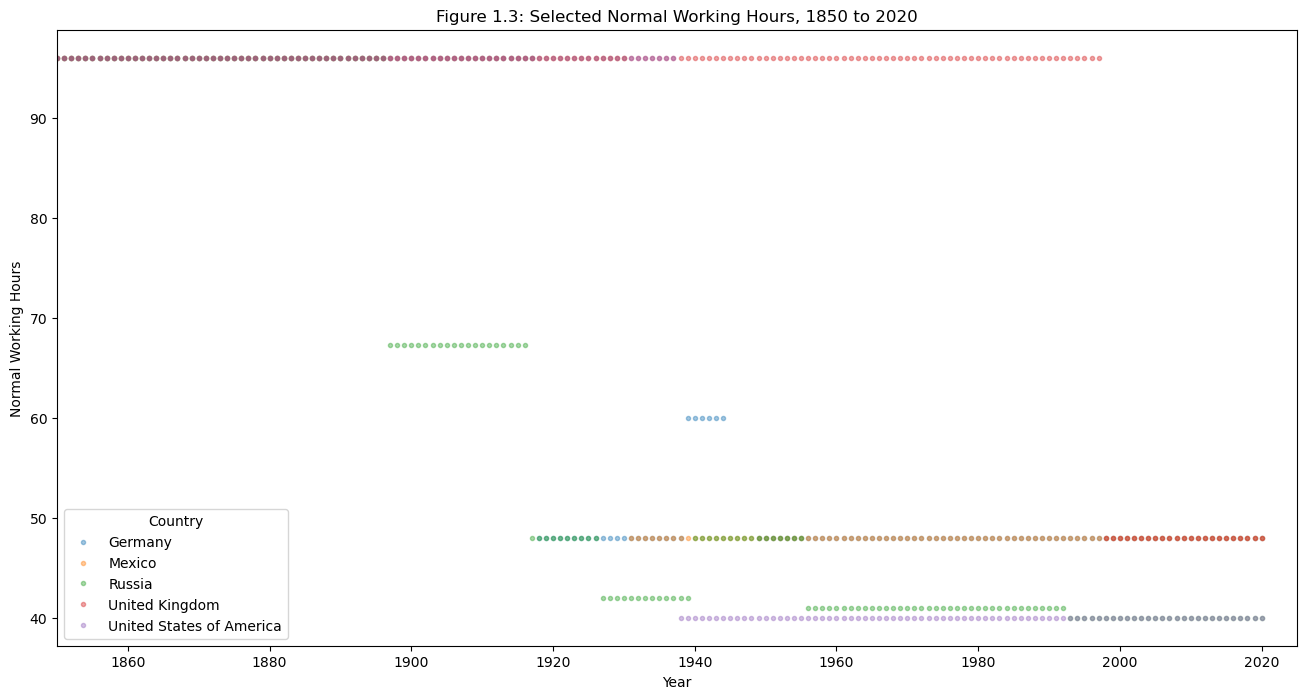

In [30]:
# Plot 1.3
#look at fewer countries here to illustrate a sort of trend more simply (like 4-6 countries)

df_select = df.loc[df['country_name'].isin(['United States of America', 'Mexico', 'Russia', 'Germany', 'United Kingdom'])]
#df_select = df.loc[df['country_name'].isin(['United Kingdom'])]

pd.pivot_table(df_select.reset_index(), index='year', columns='country_name', values='normalhours').plot(alpha=0.4, linestyle='None', marker='.')
plt.xlabel('Year')
plt.ylabel('Normal Working Hours')
plt.title('Figure 1.3: Selected Normal Working Hours, 1850 to 2020')
plt.xlim(1850, 2025)
plt.legend(title="Country")

plt.show()

Above is one visualization of five selected countries. We will anaylze these in a moment, but first will show them in 3D to get a clearer picture of each.

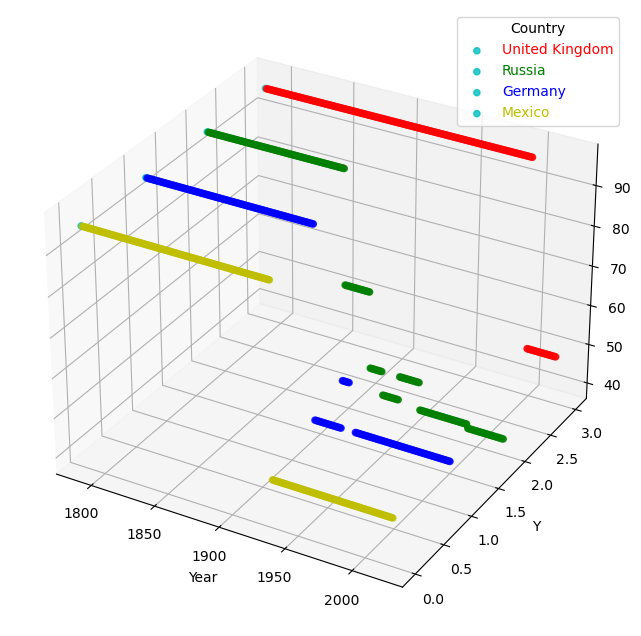

In [59]:
# Plot 1.3.1 (3D)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
country = ['United Kingdom', 'Russia', 'Germany', 'Mexico']

for clr, ypos, ctry in zip(colors, yticks, country):
    df_country = df.loc[df['country_name'] == ctry]

    xs = df_country['year']
    ys = ypos
    zs = df_country['normalhours']

    cs = [clr] * len(xs)
    cs[0] = 'c'

    a = ax.scatter(xs, ys, zs, color= cs, alpha= 0.8)    

ax.set_xlabel('Year')
ax.set_ylabel('Y')
ax.set_zlabel('Hours')

ax.legend(country, title="Country", labelcolor=colors) # this is bad...

plt.show()

Here, we clearly see the trend in each country to lowering labor hours to the modern day. Clearly, there are more factors at work than WWII, and each country perhaps experienced similar pressures at different times. These shifts are more localized than we initially thought, with a country like the United Kingdom set its lower Normal Working Hours much later than others. Of these countries, most experienced shifts much earlier than this, but not all clustered around the 1940s, which is when the United States felt a similar shift. So, it seems that countries experienced local factors, but shifted in the same way. Our hypothesis holds up for these countries, and for the wider world, given what we can observe from Figure 1.2.

### Hypothesis 2: Overtime hours and Work Culture

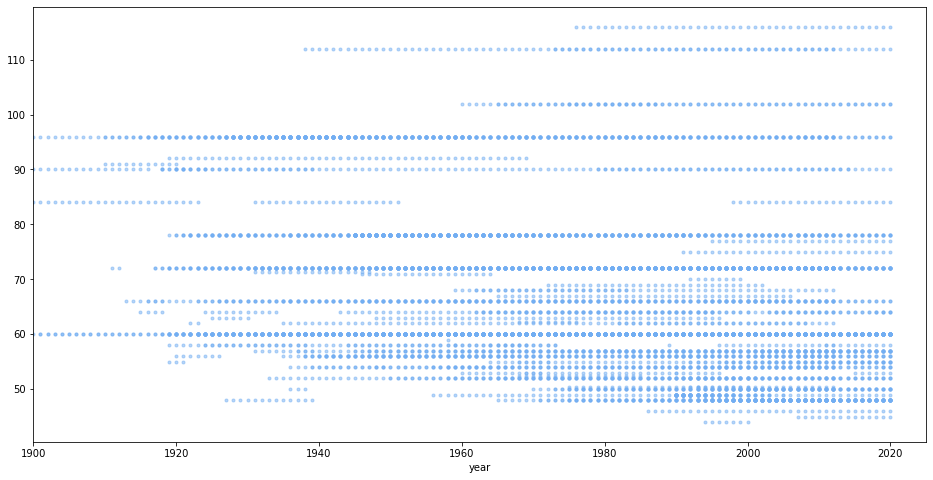

In [8]:
# Plot 2.1

df.plot(x='year',y='hours_max', legend=None, alpha=0.5, linestyle='None', marker='.', color="#72aef2") # scatter of year vs. max hours

plt.xlim(1900, 2025) # cut out values pre-1900, dataset limited in scope at this point

plt.show()

discuss trend

However, if we inspect the dataframe we can see that 'hours_max' has many NaN (missing) values. This could easily make this data less accurate, so let's inspect how many NaN items are in this column using the code below.

In [11]:
df_hours_max_and_country = df[['country_name', 'hours_max']]
count_NaN_max_hours = 0

NaN_dict = {}
NaN_list = []

#make a dictionary of format 'country':(number of nan items)
for index, row in df_hours_max_and_country.iterrows(): #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas-dataframe-iterrows 
    if(row['hours_max'] != row['hours_max']): #check if max_hours is NaN by checking if equal to self
        count_NaN_max_hours+=1
        if(not row['country_name'] in NaN_dict.keys()):
            NaN_dict[row['country_name']] = 1
        else:
            NaN_dict[row['country_name']] += 1

for key in NaN_dict:
    NaN_list.append([key, NaN_dict[key]])

df_NaN_max_hours = pd.DataFrame(NaN_list, columns=['Country', 'NaN Max Hours']).sort_values(by='NaN Max Hours').set_index(['Country'])


print(f"There are {count_NaN_max_hours} NaN items in the 'hours_max' column, out of the total of 27192 rows!")
#df_NaN_max_hours.loc[df_NaN_max_hours['NaN Max Hours'] > 100].plot.hist()
#plt.show()



There are 15785 NaN items in the 'hours_max' column, out of the total of 27192 rows!


With so many NaN values, it's clear that any trend we see in the plot above does not reflect a completely global trend, at least at some points in time.

We can plot some of this data to check what countries have these NaN values and investigate why, though it's a bit of an uglier bar graph.

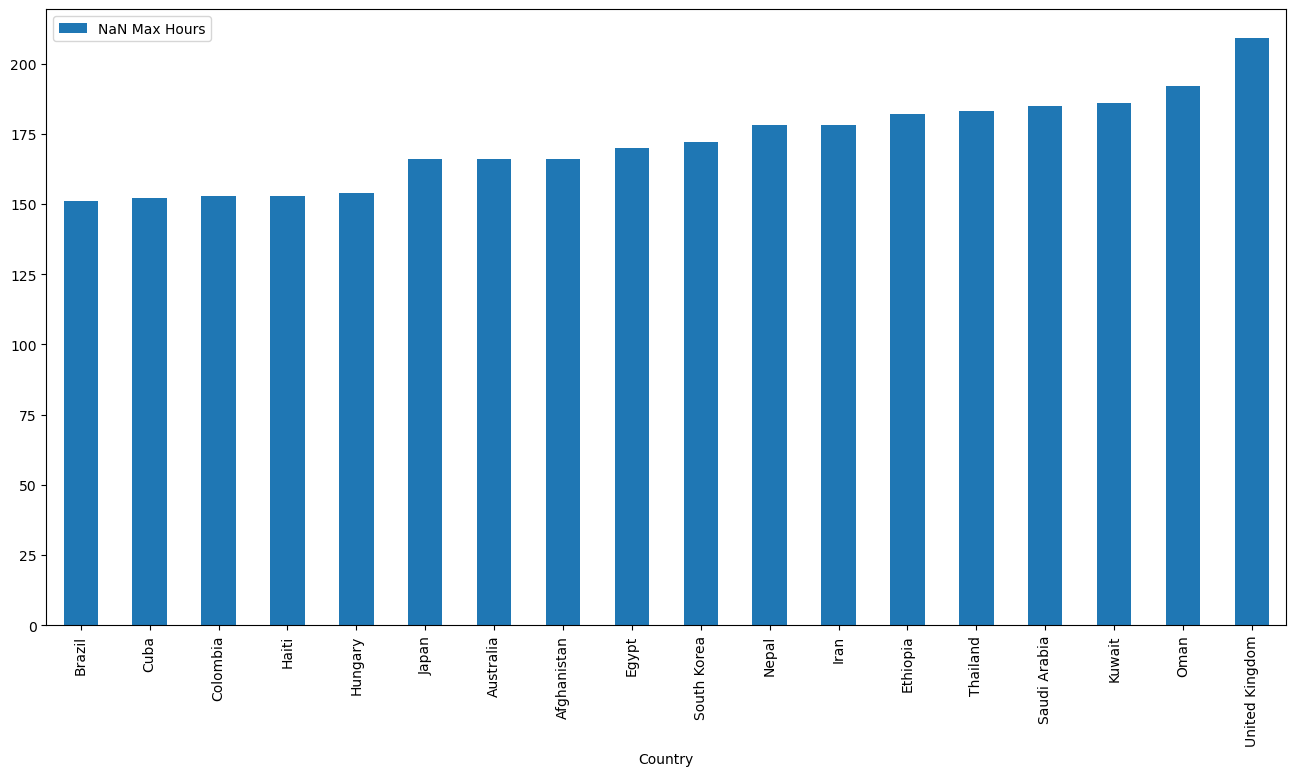

In [119]:
df_NaN_max_hours.loc[df_NaN_max_hours['NaN Max Hours'] > 150].plot.bar()
plt.show()

Picking some countries from this bar graph, we can see that there are various reasons for this missing data:


In [ ]:

df_JP = df.loc[df['country_name'] == "Japan"]
df_JP_hours = df_JP[["country_name", "year", "hours_max"]]
print(df_JP_hours)

df_2020 = df.loc[df["year"] == 2020]
df_2020.plot.scatter(x="normalhours", y="hours_max")